### Steps:
- Instantiate very simple ConvNet
- Load MNIST and predict
- Read about Deep Learning for Computer Vision

### Covered topics and learning objectives
- Introduction to ConvNets


# Introduction to convnets

First, let's take a practical look at a very simple convnet example. We will use our convnet to classify MNIST digits, using a densely-connected network (the test accuracy with the densely-connected network is approx. 97.8%). Even though our convnet will be very basic, its
accuracy will still blow out of the water that of the densely-connected model.

The 6 lines of code below show you what a basic convnet looks like. It's a stack of `Conv2D` and `MaxPooling2D` layers. We'll see in a
minute what they do concretely.
Importantly, a convnet takes as input tensors of shape `(image_height, image_width, image_channels)` (not including the batch dimension).
In our case, we will configure our convnet to process inputs of size `(28, 28, 1)`, which is the format of MNIST images. We do this via
passing the argument `input_shape=(28, 28, 1)` to our first layer.

In [1]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Let's display the architecture of our convnet so far:

In [2]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 55,744 (217.75 KB)

 Trainable params: 55,744 (217.75 KB)

 Non-trainable params: 0 (0.00 B)

You can see above that the output of every `Conv2D` and `MaxPooling2D` layer is a 3D tensor of shape `(height, width, channels)`. The width
and height dimensions tend to shrink as we go deeper in the network. The number of channels is controlled by the first argument passed to
the `Conv2D` layers (e.g. 32 or 64).

The next step would be to feed our last output tensor (of shape `(3, 3, 64)`) into a densely-connected classifier network like those you are
already familiar with: a stack of `Dense` layers. These classifiers process vectors, which are 1D, whereas our current output is a 3D tensor.
So first, we will have to flatten our 3D outputs to 1D, and then add a few `Dense` layers on top:

In [3]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

We are going to do 10-way classification, so we use a final layer with 10 outputs and a softmax activation. Now here's what our network
looks like:

In [4]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

As you can see, our `(3, 3, 64)` outputs were flattened into vectors of shape `(576,)`, before going through two `Dense` layers.

Now, let's train our convnet on the MNIST digits.

In [5]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

EPOCHS = 5
model.fit(train_images, train_labels, epochs=EPOCHS, batch_size=64)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 51s 53ms/step - accuracy: 0.8626 - loss: 0.4257
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 49s 53ms/step - accuracy: 0.9844 - loss: 0.0512
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 51ms/step - accuracy: 0.9895 - loss: 0.0335
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 83s 53ms/step - accuracy: 0.9932 - loss: 0.0224
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 52ms/step - accuracy: 0.9939 - loss: 0.0196


Let's evaluate the model on the test data:

In [7]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9857 - loss: 0.0472
Test accuracy: 0.989


A densely-connected network has a test accuracy of 97.8%, our basic convnet has a test accuracy of 99.3%: we
decreased our error rate by 68% (relative). Not bad!

In [26]:
import numpy as np
import matplotlib.pylab as plt


[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
predicted 3


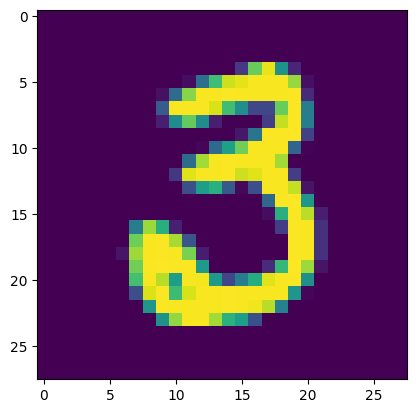

In [41]:
random_index = np.random.choice(np.arange(0,60000))
random_image = train_images [ random_index, ...]
plt.imshow(random_image)
print(train_labels[random_index])

# Add a batch dimension to the random_image
random_image_batch = np.expand_dims(random_image, axis=0)

# Now predict on the batch containing the single image
predictions = model.predict(random_image_batch)

predicted_label = np.argmax(predictions)
print(f"predicted {predicted_label}")


In [34]:
# Add a batch dimension to the random_image
random_image_batch = np.expand_dims(random_image, axis=0)

# Now predict on the batch containing the single image
predictions = model.predict(random_image_batch)

predicted_label = np.argmax(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


In [29]:
predicted_label

9

## Deep Learning for Computer vision theory

Go to https://cs231n.github.io/ and read Module 2.
This will probably take you 1-2 hours to read & understand.